# Analise de Venda


## Importando bibliotecas.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from itertools import combinations
from collections import Counter
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Converter 12 meses de dados de venda em um só arquivo 

In [2]:
path = r'C:\Users\Armando\Desktop\Pandas-Data-Science-Tasks-master (1)\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'

In [3]:
files = [file for file in os.listdir(path)]

all_data = pd.DataFrame()

for file in files:
    file = "\\" + file
    df = pd.read_csv(path + file)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv('all_data.csv', index=False)

## Lendo os dados atualizados


In [4]:
all_data = pd.read_csv('all_data.csv')

## Questão 1: qual mês teve mais vendas, e quanto dinheiro foi ganho nesse Mês?

In [5]:
all_data= all_data.dropna()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
all_data[['Date', 'Hour']] = all_data['Order Date'].str.split(' ', expand=True )


In [8]:
dt_clean = all_data['Date'] != 'Order'   
dt_clean = all_data[dt_clean]


In [9]:
dt_clean['Data'] = pd.to_datetime(dt_clean['Date'], format='%m/%d/%y')
dt_clean['Quantity Ordered'] = pd.to_numeric(dt_clean['Quantity Ordered'])
dt_clean['Price Each'] = pd.to_numeric(dt_clean['Price Each'])
dt_clean['Total Sell'] = dt_clean['Price Each'] * dt_clean['Quantity Ordered']

In [10]:
dt_clean['Mês'] = dt_clean['Data'].dt.month

In [11]:
vendas_por_mes = pd.DataFrame(dt_clean.groupby('Mês')['Total Sell'].sum())
vendas_por_mes.sort_values('Total Sell')

,Total Sell
Mês,
1,1822256.73
9,2097560.13
2,2202022.42
8,2244467.88
6,2577802.26
7,2647775.76
3,2807100.38
5,3152606.75
11,3199603.20


Text(0, 0.5, 'Vendas(*10^6)')

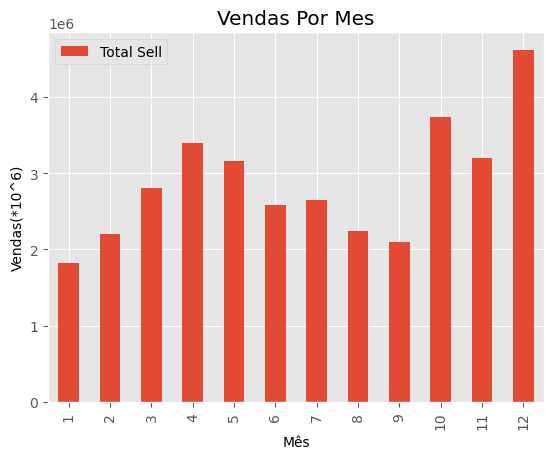

In [12]:
ax = vendas_por_mes.plot(kind='bar', title= 'Vendas Por Mes')
ax.set_ylabel('Vendas(*10^6)')

## Questão 2: Qual Cidade tem o maior Numero de vendas?

In [13]:
dt_clean[['Street','City', 'ZIP']] = dt_clean['Purchase Address'].str.split(', ', expand=True)

In [14]:
venda_por_cidade = pd.DataFrame(dt_clean.groupby('City')['Total Sell'].sum())


Text(0.5, 0, 'Vendas(10^6)')

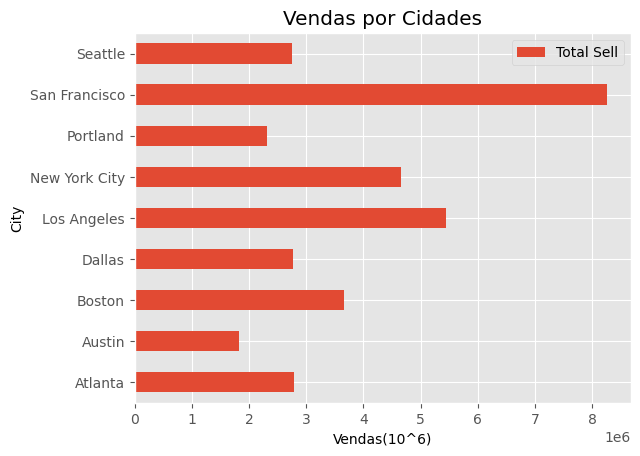

In [15]:
ax = venda_por_cidade.plot(kind = 'barh', title = 'Vendas por Cidades')
ax.set_xlabel('Vendas(10^6)')

## Questão 3: Que horas deverão passar anuncios para que a probablidade de Venda seja maior?

In [16]:
dt_clean['Order Date'] = pd.to_datetime(dt_clean['Order Date'])

dt_clean['Hour'] = dt_clean['Order Date'].dt.hour
dt_clean['Minute'] = dt_clean['Order Date'].dt.minute

dt_clean.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Hour,Data,Total Sell,Mês,Street,City,ZIP,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04/19/19,8,2019-04-19,23.90,4,917 1st St,Dallas,TX 75001,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04/07/19,22,2019-04-07,99.99,4,682 Chestnut St,Boston,MA 02215,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14,2019-04-12,600.00,4,669 Spruce St,Los Angeles,CA 90001,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14,2019-04-12,11.99,4,669 Spruce St,Los Angeles,CA 90001,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04/30/19,9,2019-04-30,11.99,4,333 8th St,Los Angeles,CA 90001,27


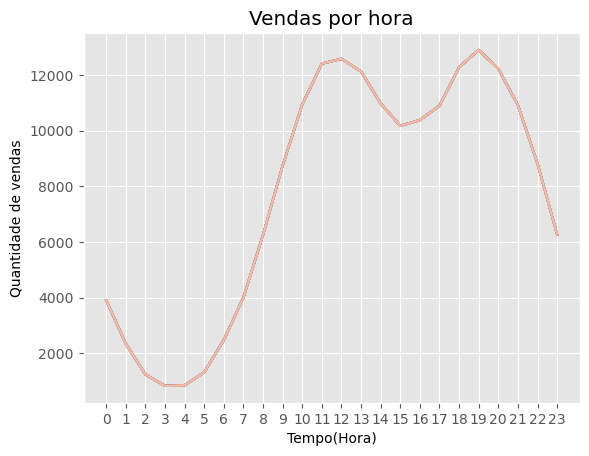

In [17]:
hours = [hour for hour, df in dt_clean.groupby('Hour')]

plt.plot(hours, dt_clean.groupby('Hour').count())
plt.title("Vendas por hora")
plt.xlabel('Tempo(Hora)')
plt.ylabel('Quantidade de vendas')
plt.xticks(hours)
plt.show()

## Quais produtos são mais vendidos juntos? 

In [18]:
vendas_correlatas = dt_clean[dt_clean['Order ID'].duplicated(keep=False)]


In [19]:
vendas_correlatas['Ordem Completa'] = vendas_correlatas.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
vendas_correlatas.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Hour,Data,Total Sell,Mês,Street,City,ZIP,Minute,Ordem Completa
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14,2019-04-12,600.00,4,669 Spruce St,Los Angeles,CA 90001,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14,2019-04-12,11.99,4,669 Spruce St,Los Angeles,CA 90001,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04/03/19,19,2019-04-03,600.00,4,20 Hill St,Los Angeles,CA 90001,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04/03/19,19,2019-04-03,11.95,4,20 Hill St,Los Angeles,CA 90001,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04/07/19,11,2019-04-07,99.99,4,823 Highland St,Boston,MA 02215,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [20]:
vendas_correlatas = vendas_correlatas[['Order ID','Ordem Completa']].drop_duplicates()

In [21]:
vendas_correlatas

,Order ID,Ordem Completa
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [23]:
count = Counter()
for row in vendas_correlatas['Ordem Completa']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Questão 5: qual produto mais vendeu?e pq voce acha que ele foi o que mais vendeu?

In [24]:
dt_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Hour,Data,Total Sell,Mês,Street,City,ZIP,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04/19/19,8,2019-04-19,23.90,4,917 1st St,Dallas,TX 75001,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04/07/19,22,2019-04-07,99.99,4,682 Chestnut St,Boston,MA 02215,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14,2019-04-12,600.00,4,669 Spruce St,Los Angeles,CA 90001,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14,2019-04-12,11.99,4,669 Spruce St,Los Angeles,CA 90001,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04/30/19,9,2019-04-30,11.99,4,333 8th St,Los Angeles,CA 90001,27


In [38]:
ax = dt_clean.groupby('Product')['Quantity Ordered'].sum().sort_values()

Text(0, 0.5, '')

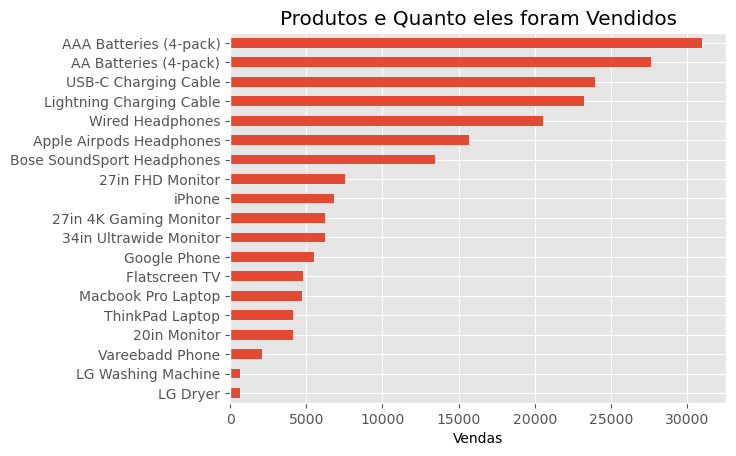

In [39]:
ax = ax.plot(kind='barh', title='Produtos e Quanto eles foram Vendidos')
ax.set_xlabel('Vendas')
ax.set_ylabel('')

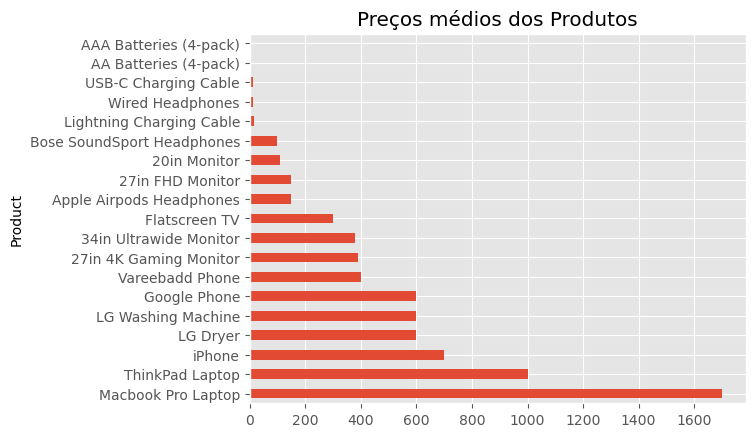

In [52]:
ax = dt_clean.groupby('Product').mean()['Price Each'].sort_values(ascending=False).plot(kind='barh', title='Preços médios dos Produtos')

In [53]:
#AAA bateries são os produtos mais vendidos, e claramente 
#isso se deve ao seu ticket médio ser o menor, todavia isso não quer dizer que esse é o produto mais lucrativo
#Outra análise seria necessária para observar isso.